In [62]:
"""LiuKatrina_03.ipynb Harvard MCB 112 Problem Set 03: the adventure of 
the missing phenotype submitted by Xiao (Katrina) Liu"""
__author__      = "Katrina Liu"
__email__ = "xliu@hms.harvard.edu"
__date__ = "Sep 24, 2022"

In [63]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

# Exercise 1: downsample the data set by reservoir sampling
First, we implement the reservoir sampling algorithm based on the description of the MCB 112 week 03 lecture notes.

In [64]:
def reservoir_sampling(m,n):
    """ Reservior sampling algorithm to uniformly sample m samples from n total
    items with probability m/n.
    :param m: sample size
    :param n: total size
    :return: the randomly sampled values
    """
    reservoir = [i for i in range(m)]
    for k in range(m,n):
        r = np.random.choice(k)
        if r < m:
            reservoir[r] = k
    return reservoir

Next, we implement a function to sample any number of lines using the previously implemented algorithm and basic Python code.

In [65]:
def sample_tbl_lines(table_filename, line_num):
    """ Sample a given number of lines with reservoir algorithm from the table 
    file. Ignore comment lines.
    :param table_filename: the string representing path of table tile.
    :param line_num: the number of lines to be sampled.
    :return: a list of line_num many sampled table lines
    """
    f = open(table_filename)
    content_lines = list(filter(lambda line:not line.startswith("#"), 
                                f.read().split("\n")))
    f.close()
    n = len(content_lines)
    samples = reservoir_sampling(line_num, n)
    sampled_lines = [content_lines[i] for i in samples]
    return sampled_lines

The actual 10 sampled lines looks as follows:

In [66]:
# Sampling 10 lines from the w03-data.tbl file
sample = sample_tbl_lines("w03-data.tbl",10)
for line in sample:
    print(line)

DHDDS             80.7   76.5   80.3   51.4   50.8   79.8   78.2   49.7   50.1   49.5   66.6   84.0   46.1   66.1   52.0   47.1   63.8   53.3   78.2   70.9
OR10J3            78.9   79.3   79.5   52.2   51.8   78.2   77.8   51.6   51.6   51.4   72.4   64.9   65.5   92.0   50.1   63.9  103.8   53.3   54.4   63.4
RPGRIP1L          49.3   44.1   47.9   76.2   76.1   44.9   49.4   76.9   71.5   73.1   68.7   68.3   87.8   57.4   43.2   46.6   38.0   62.7   75.5   48.2
NUDT4             37.0   35.1   35.2   63.6   65.4   41.2   37.2   64.6   64.6   65.0   64.4   63.6   53.3   36.9   27.0   41.6   50.0   66.3   49.6   64.7
SOX2              49.0   56.8   52.7   28.8   28.5   52.3   52.3   29.7   30.6   28.1   67.9   44.7   57.1   36.7   52.1   65.3   28.0   55.1   18.1   52.6
PTGES3L-AARSD1    43.7   38.9   42.5   70.3   71.6   42.1   44.2   68.6   72.8   72.6   47.9   46.8   63.3   49.8   25.3   50.7   31.2   43.1   47.5   52.2
PI4K2A            29.7   30.6   29.0   59.5   57.0   26.2   31.3

# Exercise 2: look at outliers; validate the formatting; and clean the data
Before we start analyze the data, we need to be able to determine if the a value from the table can actually be converted to a float expression level.

In [67]:
def is_float(e):
    """ Determining if a value can be converted to float.
    :param e: value to be determined
    :return: a boolean indicating if the value can be converted to float.
    """
    try:
        expr = float(e)
    except ValueError:
        return False
    return True

Then, we are able to examine the data and extract relevant information:
* Find and print the data line that contains the maximum expression level.

In [68]:
def find_max_expr_level(filename):
    """ Find the line containing the maximum expression level from the file
    :param filename: the string of path to the table
    :return: the maximum expression value and the line containing the maximum
            expression level
    """
    f = open(filename)
    content_lines = f.read().strip().split("\n")
    f.close()
    max_expr = 0
    max_line = ""
    for line in content_lines:
        if not line.startswith("#"):
            line_values = line.split()
            for i in range(1, len(line_values)):
                if is_float(line_values[i]):
                    expr = float(line_values[i])
                    if expr > max_expr:
                        max_expr = expr
                        max_line = line
    return max_expr, max_line

In [69]:
# Locate the maximum expression level from table w03-data.tbl
max_expression, max_expr_line = find_max_expr_level("w03-data.tbl")
print("The line with max expression level is the line %s with level %f." % 
      (max_expr_line, max_expression))

The line with max expression level is the line HSH2D             53.5   53.5   57.3   82.9   83.3   61.2   52.6   85.8   86.0   80.9   63.4   64.7  125.5   84.8   69.8   56.9   65.2   55.7   96.9   81.8 with level 125.500000.


* Find and print the data line that contains the minimum expression level.

In [70]:
def find_min_expr_level(filename):
    """ Find the line containing the minimum expression level from the file
    :param filename: the string of path to the table
    :return: the minimum expression value and the line containing the minimum
            expression level
    """
    f = open(filename)
    content_lines = f.read().split("\n")
    f.close()
    min_expr = sys.float_info.max
    min_line = ""
    for line in content_lines:
        if not line.startswith("#"):
            line_values = line.split()
            for i in range(1, len(line_values)):
                if is_float(line_values[i]):
                    expr = float(line_values[i])
                    if expr < min_expr:
                        min_expr = expr
                        min_line = line
    return min_expr, min_line

In [71]:
# Locate the minimum expression level from table w03-data.tbl
min_expression, min_expr_line = find_min_expr_level("w03-data.tbl")
print("The line with min expression level is the line %s with level %f." % (min_expr_line, min_expression))

The line with min expression level is the line blackberry      -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 with level -999.000000.


* Find lines that don't have the right format.
At this point, from the attempt of previous two analysis, we see that the two problems with the raw dataset is that it contains non-float values and it contains negative values for gene expression level, which is impossible. So, in order to find invalid lines, we will identify lines with the two errors.

In [72]:
def find_invalid_lines(filename):
    """ Find the lines with negative values or non float values for gene 
    expressions from the given file.
    :param filename: the string of path to the file
    :return: the lines contains invalid data
    """
    f = open(filename)
    content_lines = f.read().strip().split("\n")
    f.close()
    invalid_lines = []
    for line in content_lines:
        if not line.startswith("#"):
            line_values = line.split()
            line_valid = True
            if len(line_values) != 21:
                line_valie = False
            for i in range(1, len(line_values)):
                if is_float(line_values[i]):
                    expr = float(line_values[i])
                    if expr < 0:
                        line_valid = False
                else:
                    line_valid = False
            if not line_valid:
                invalid_lines.append(line)
    return invalid_lines

In [73]:
# Find the invalid lines of the table w03-data.tbl
invd_lines = find_invalid_lines("w03-data.tbl")
print("Number of invalid lines: ", len(invd_lines))
print(invd_lines)

Number of invalid lines:  40
['blackberry      -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0', 'MRTO4             n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.', 'C1orf145          n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.   n.d.', 'ZNF514          -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0', 'RPUSD3          -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0', 'EIF1B           -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0', 'SNRK           

The number of the invalid lines identified is exactly 40, meaning that we have the correct errors. Then, we just need a function to eliminate the lines with the errors in order to have a clean dataset for further analysis.

In [74]:
def remove_invalid_lines(filename):
    """ Remove the invalid lines with negative values or non float values 
    for gene expressions from the given file.
    :param filename: the string of path to the table
    :return: a list of valid lines.
    """
    f = open(filename)
    content_lines = f.read().strip().split("\n")
    valid_lines = []
    for line in content_lines:
        if not line.startswith("#"):
            line_values = line.split()
            line_valid = True
            if len(line_values) != 21:
                line_valie = False
            for i in range(1, len(line_values)):
                if is_float(line_values[i]):
                    expr = float(line_values[i])
                    if expr < 0:
                        line_valid = False
                else:
                    line_valid = False
            if line_valid:
                valid_lines.append(line)
    return valid_lines

In [75]:
# Obtain the table with only valid lines
valid_table = remove_invalid_lines("w03-data.tbl")
print("Number of valid lines: ",len(valid_table))

Number of valid lines:  19991


The number of lines in clean dataset is 19991 as expected.
# Exercise 3: tidy the data
A tidy dataset is considered to have an observation per row, a variable per column, and a observational unit per table. In our experiment, a expression level of a gene should be a variable and a collection of expression levels of all genes from one sample should be one observation. Therefore, we need to tidy the table in this way and add the genotype and sex information of each sample to the table. 

In [76]:
def tidy_data_table(clean_data_lines, obs_num, output_filename, add_variables={}):
    """ Use valid lines and construct a wide tidy format and store to the
    output file.
    :param clean_data_lines: a list of strings with clean data
    :param obs_num: number of observations
    :param output_filename: the string of path to the output table
    :param add_variables: a dictionary of additional variables to be added to 
    the original table
    """
    header_row = ["subject"]
    tidy_data = [[str(i)] for i in range(obs_num)]
    for key in add_variables.keys():
        header_row.append(key)
        for i in range(obs_num):
            tidy_data[i].append(add_variables[key][i])
            
    for line in clean_data_lines:
        line_vals = line.split()
        gene_name = line_vals[0]
        gene_exprs = line_vals[1:]
        header_row.append(gene_name)
        for i in range(obs_num):
            tidy_data[i].append(gene_exprs[i])
    
    f = open(output_filename, "w")
    f.write(" ".join(header_row)+"\n")
    for line in tidy_data:
        f.write(" ".join(line)+"\n")


In [77]:
# Tidy the w03-data.tbl into wide format and add the genotype and sex 
# information
valid_lines = remove_invalid_lines("w03-data.tbl")
tidy_data_table(valid_lines,20, "w03-data-tidied.tbl", 
                {"genotype": ["wt","wt","wt","wt","wt","wt","wt",
                              "wt" ,"wt","wt","mut","mut","mut",
                              "mut","mut","mut","mut","mut","mut",
                              "mut"],
                 "sex": ["M","M","M","F","F","M","M","F","F",
                         "F","F","M","M","M","F","F","F","F",
                         "M","M"]})
tidied_data = pd.read_csv("w03-data-tidied.tbl", sep=" ")
tidied_data

,subject,genotype,sex,anise,apricot,artichoke,arugula,asparagus,avocado,banana,...,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1
0,0,wt,M,67.1,19.7,66.0,72.0,76.4,30.9,87.8,...,58.4,70.3,43.6,79.3,59.2,72.6,47.9,14.7,77.8,54.0
1,1,wt,M,67.2,12.5,65.3,76.3,77.3,40.2,82.9,...,60.3,66.4,44.5,73.4,56.7,72.5,51.6,14.1,78.6,55.4
2,2,wt,M,68.4,17.4,63.2,78.5,72.8,33.6,83.9,...,60.1,69.8,40.7,79.8,57.4,70.7,56.9,15.5,76.2,56.8
3,3,wt,F,37.9,44.4,39.2,46.5,47.4,62.1,55.0,...,31.8,38.1,70.4,44.9,29.9,45.6,74.2,46.1,45.4,25.6
4,4,wt,F,37.0,46.1,40.6,48.2,43.0,65.5,59.8,...,30.8,37.2,72.6,46.4,30.5,43.8,77.9,44.0,51.3,27.5
5,5,wt,M,67.0,18.1,64.4,77.2,77.7,37.2,87.9,...,61.5,68.6,45.8,77.7,58.3,74.5,49.9,14.5,80.8,52.4
6,6,wt,M,67.5,18.9,64.7,76.8,73.3,35.9,78.6,...,61.4,64.7,46.2,74.7,65.2,68.8,49.0,13.1,76.0,55.5
7,7,wt,F,39.7,49.3,38.2,47.1,47.2,66.5,53.3,...,29.3,38.9,77.0,50.6,32.2,41.5,77.4,46.2,49.1,26.6
8,8,wt,F,37.3,47.0,41.0,45.3,50.4,64.5,62.9,...,31.8,42.0,69.1,48.3,31.2,43.7,82.9,43.8,49.1,24.0
9,9,wt,F,36.1,40.9,39.7,49.2,45.5,59.7,59.4,...,30.5,40.5,70.9,46.9,27.2,42.1,79.7,45.6,49.5,27.1


# Exercise 4: visualize the data and explain your conclusions
In order to visualize the data better with seaborn package, we first transform the wider format tidy data into the longer format tidy data.
* Beeswarm plot 
First, we extract the 10 genes from the whole table and construct a wide table.

In [78]:
def extract_genes(gene_names, gene_num):
    """ Extract a certain number of genes randomly with reservoir algorithms
    from the given dataframe.
    :param gene_names: a list of all gene names
    :param gene_num: the number of genes to be extracted
    """
    rand_sampled_indices = reservoir_sampling(gene_num,len(gene_names))
    rand_sample = [gene_names[i] for i in rand_sampled_indices]
    return rand_sample


In [79]:
# Randomly select 10 genes and build a wide tidy data table with them
gene_names = tidied_data.columns[3:]
rand_gene_names = extract_genes(gene_names,10)
rand_data = tidied_data[["subject", "genotype","sex"]+rand_gene_names]
rand_data

,subject,genotype,sex,P2RX5,MTG1,HIST1H2BK,TCEAL3,CD300E,KIF21B,FBXO2,TCF7,NAPB,COX6B2
0,0,wt,M,50.2,38.0,52.2,43.4,25.6,54.5,67.9,67.4,88.5,39.1
1,1,wt,M,47.5,36.9,51.8,41.6,21.3,61.0,72.9,70.4,84.9,43.6
2,2,wt,M,48.2,40.4,52.7,43.9,26.3,58.0,72.1,73.5,85.6,43.3
3,3,wt,F,76.0,66.7,21.1,18.6,55.4,26.2,47.6,43.0,55.1,68.5
4,4,wt,F,71.6,67.4,19.2,10.9,55.5,25.7,47.0,36.6,54.7,66.9
5,5,wt,M,49.7,37.7,54.4,43.7,25.5,57.3,71.1,68.9,85.6,37.9
6,6,wt,M,46.3,42.2,52.5,44.0,29.2,57.3,72.2,70.3,85.9,39.6
7,7,wt,F,75.3,69.1,19.5,14.8,54.6,25.0,41.9,39.9,57.8,68.1
8,8,wt,F,74.2,66.8,25.9,20.3,51.7,28.3,47.1,40.0,52.3,65.1
9,9,wt,F,71.8,68.2,28.7,15.1,50.7,28.2,44.5,43.1,57.2,67.9


Then, we construct a long tidy table.

In [80]:
def select_and_melt_tbl(df, select_genes, features_to_keep, var_name, 
                        value_name):
    """ Select data related to a list of genes and keep the needed features and
    convert the wide tidy table to long tidy table by using melt
    :param df: original pandas dataframe containing gene expression levels
    :param select_genes: a list of selected gene names
    :param features_to_keep: a list of variable names from original dataframe
    :param var_name: the string representing the newly added variable name
    :param value_name: the string representing the value name
    """
    select_data = df[features+select_genes]
    select_data_long = pd.melt(select_data, id_vars=features_to_keep, 
                               value_vars=select_data[select_genes], 
                               var_name=var_name, value_name=value_name)
    return select_data_long

In [81]:
# Melt parameters
features = ["subject","sex","genotype"]
var_name = "gene"
value_name = "TPM"

In [82]:
# Melt wide table and plot the results
rand_data_long = select_and_melt_tbl(tidied_data, rand_gene_names, features, 
                                     var_name, value_name)
rand_data_long

,subject,sex,genotype,gene,TPM
0,0,M,wt,P2RX5,50.2
1,1,M,wt,P2RX5,47.5
2,2,M,wt,P2RX5,48.2
3,3,F,wt,P2RX5,76.0
4,4,F,wt,P2RX5,71.6
...,...,...,...,...,...
195,15,F,mut,COX6B2,49.7
196,16,F,mut,COX6B2,43.7
197,17,F,mut,COX6B2,61.1
198,18,M,mut,COX6B2,42.8


Lastly, we can plot out the result.
* Swarm plot

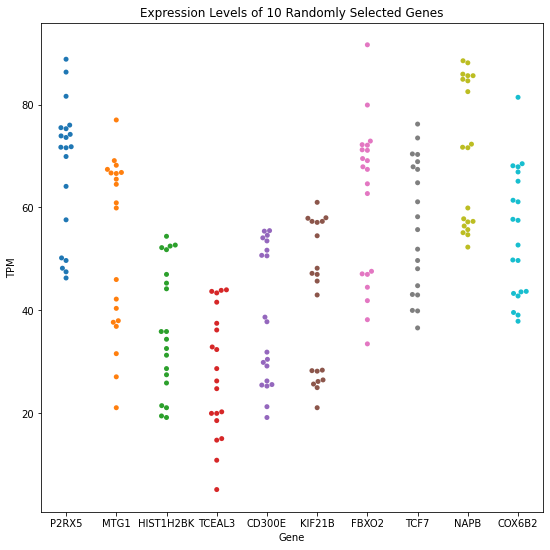

In [83]:
# Swarm plot of randomly selected gene expression levels
plt.figure(figsize=(9,9))
sns.swarmplot(x="gene", y="TPM", data=rand_data_long)
plt.title("Expression Levels of 10 Randomly Selected Genes")
plt.xlabel("Gene")
plt.show()

* Categorical plot

<Figure size 1296x1296 with 0 Axes>

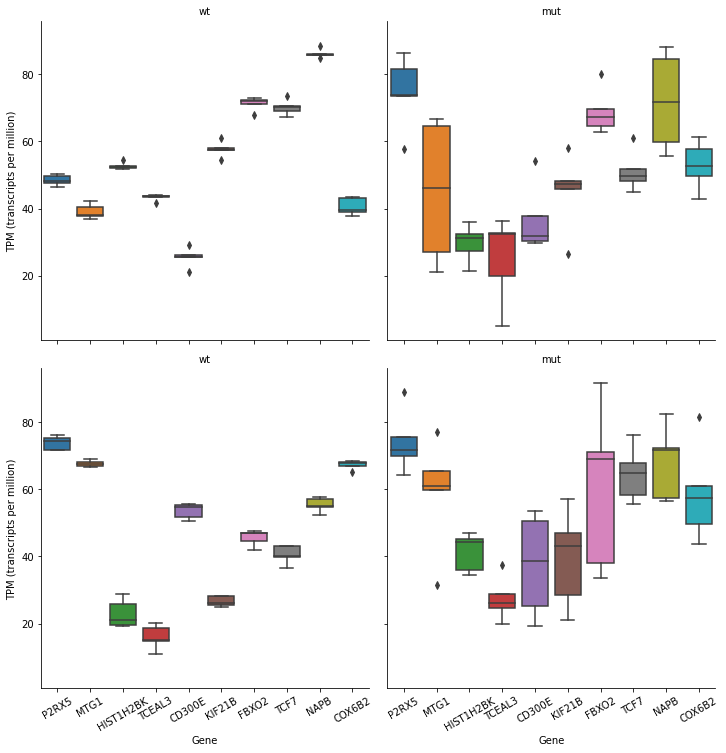

In [84]:
# Categorical box plot of the randomly selected gene expression levels
plt.figure(figsize=(18,18))
g = sns.catplot(x="gene", y="TPM", data=rand_data_long, col="genotype",
                row="sex",kind="box")
g.set_axis_labels("Gene", "TPM (transcripts per million)")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=30)
plt.show()

* Strip plot with jitters

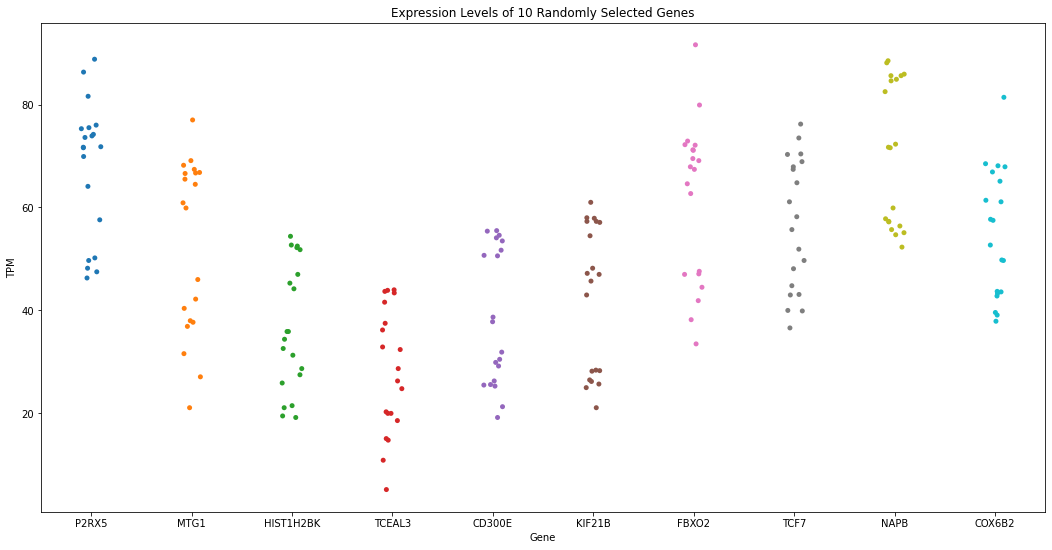

In [85]:
# Strip plot of the randomly selected gene expression level
plt.figure(figsize=(18,9))
sns.stripplot(x="gene", y="TPM", data=rand_data_long, jitter=True)
plt.title("Expression Levels of 10 Randomly Selected Genes")
plt.xlabel("Gene")
plt.show()

# Exploring Coriander Genes
## Extracting the data
The very first step is the to extract the coriander related gene expression levels for plotting out the results.

In [86]:
# Select the coriander related genes
select_genes = ["coriander","arugula", "cayenne", "juniper", "yam"]
select_data_long = select_and_melt_tbl(tidied_data, select_genes, features,
                                       var_name, value_name)

## Plotting the data
* Swarm plot
We first plot out the gene expressions and separate them by the genotypes.

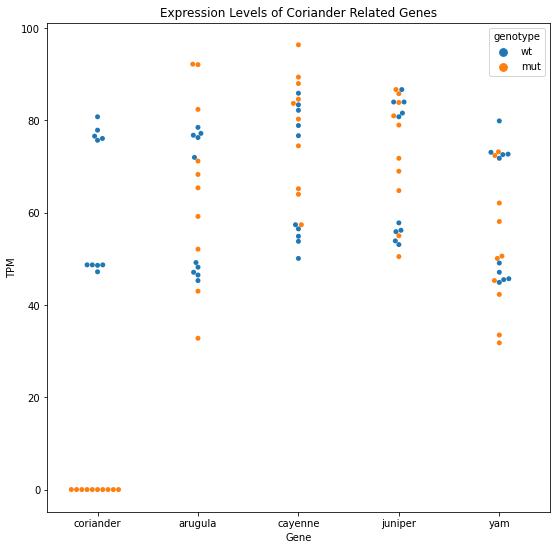

In [87]:
# Build swarm plot of the expression levels of Coriander related genes
plt.figure(figsize=(9,9))
sns.swarmplot(x="gene", y="TPM", data=select_data_long, hue="genotype")
plt.title("Expression Levels of Coriander Related Genes")
plt.xlabel("Gene")
plt.show()

From the above swarm plot, we could not identify a noticable differences between the gene expressions of mutated samples and those of the wildtype samples.

* Category plot
We then create a category plot with facets separated by both genotypes and sex.

<Figure size 1296x648 with 0 Axes>

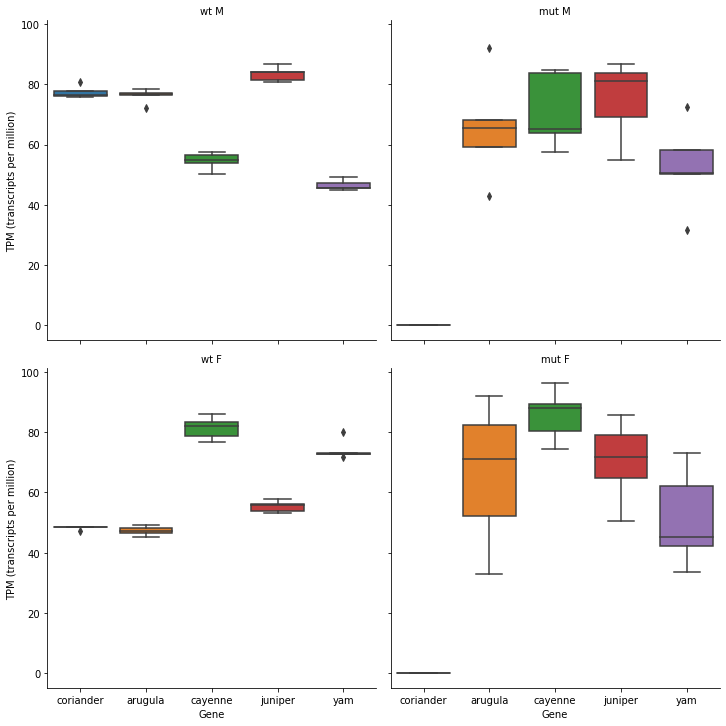

In [88]:
# Build category box plots of the Coriander related gene expression levels
plt.figure(figsize=(18,9))
g= sns.catplot(x="gene", y="TPM", data=select_data_long, col="genotype", 
               row='sex',kind="box")
g.set_axis_labels("Gene", "TPM (transcripts per million)")
g.set_titles("{col_name} {row_name}")
plt.show()

We see that, when the data was separated by sex, there is a noticable change in distributions of the gene expressions of different genotypes of each gene in each group.

* Strip plot with jitter
Lastly, we want to see if the strip plot gives more information

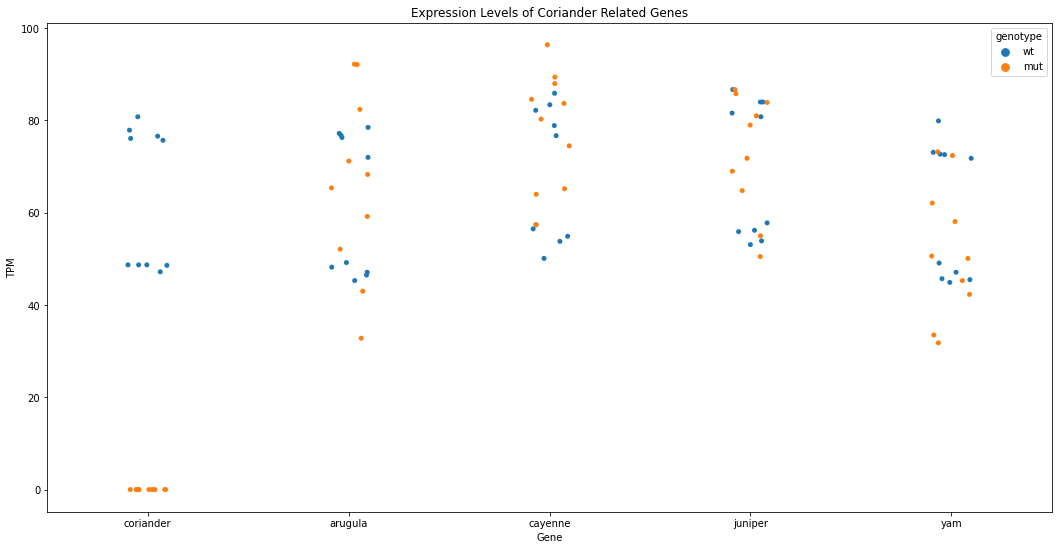

In [89]:
# Build strip plot with jitter of Coriander related gene expression levels
plt.figure(figsize=(18,9))
sns.stripplot(x="gene", y="TPM", data=select_data_long, jitter=True, 
              hue="genotype")
plt.title("Expression Levels of Coriander Related Genes")
plt.xlabel("Gene")
plt.show()

However, it does not provide more information than the swarm plot did.

## Analyzing the data
From the plots, we can see that the knock out of Coriander gene shows a noticeable impact on the distributions of gene expression. We also noticed that, the sex of samples affects the gene expression of level of the Coriander related genes. By controlling the variable sex, we see how the genotype of Coriander gene significantly impacts the gene expression level of the related genes.